# SALES PREDICTION USING PYTHON

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and Explore Data

In [2]:
# Load the dataset
data = pd.read_csv('sales.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Check for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

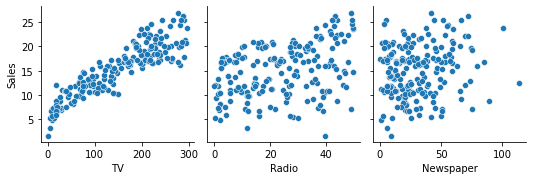

In [9]:
# Pairplot to visualize pairwise relationships in the dataset
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

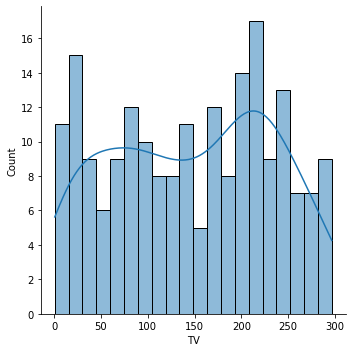

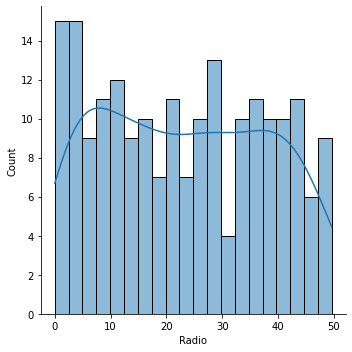

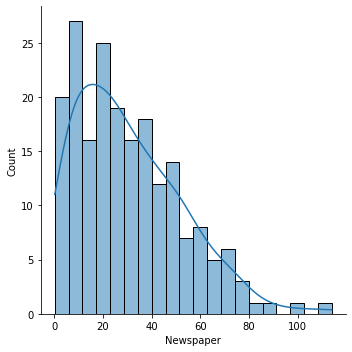

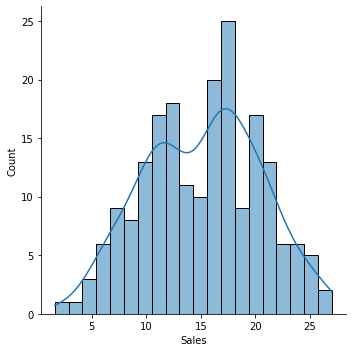

In [10]:
# Distribution of each feature without KDE
sns.displot(data['TV'], bins=20, kde=True)
sns.displot(data['Radio'], bins=20, kde=True)
sns.displot(data['Newspaper'], bins=20, kde=True)
sns.displot(data['Sales'], bins=20, kde=True)
plt.show()

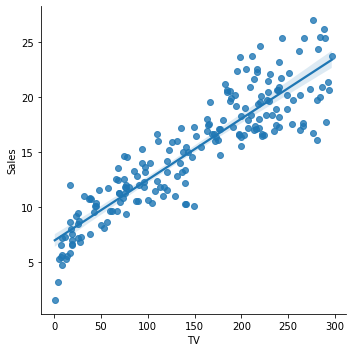

In [11]:
# Scatter plot with regression line to show the relationship between TV and Sales
sns.lmplot(x='TV', y='Sales', data=data)
plt.show()

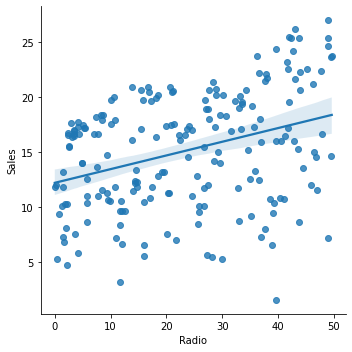

In [12]:
# Scatter plot with regression line to show the relationship between Radio and Sales
sns.lmplot(x='Radio', y='Sales', data=data)
plt.show()

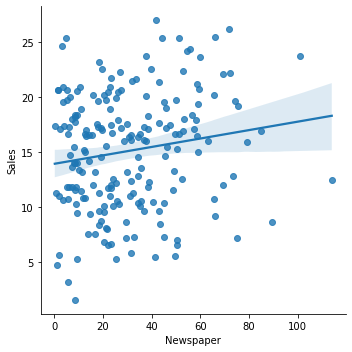

In [13]:
# Scatter plot with regression line to show the relationship between Newspaper and Sales
sns.lmplot(x='Newspaper', y='Sales', data=data)
plt.show()

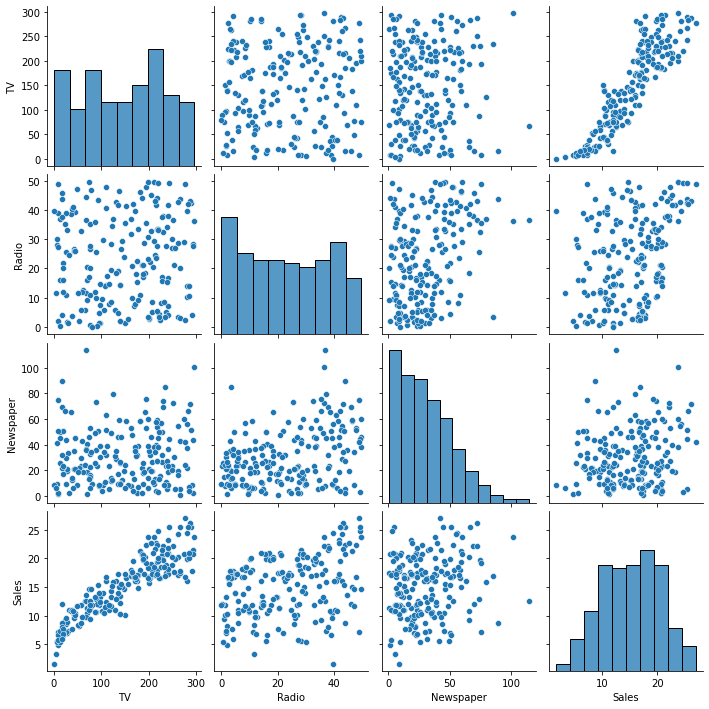

In [14]:
# Scatter plot matrix
sns.pairplot(data)
plt.show()

In [15]:
# Set the style for the plots
plt.style.use('seaborn-whitegrid')

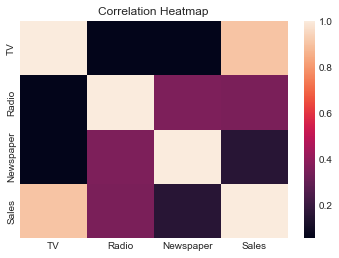

In [16]:
# Create a heatmap to visualize correlations between variables
sns.heatmap(data.corr())
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [17]:
# Split the data into features (X) and target (y)
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [18]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build and Evaluate Model

In [19]:
# Create a linear regression model
model = LinearRegression()

In [20]:
# Train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# Make predictions on the testing data
y_pred = model.predict(x_test)

In [22]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.907756910271093


# Visualization of Predictions

In [23]:
# Create a DataFrame to hold the predicted sales
data = pd.DataFrame(data={"Predicted Sales": y_pred.flatten()})

In [24]:
# Display the DataFrame with predicted sales
print(data)

    Predicted Sales
0         17.034772
1         20.409740
2         23.723989
3          9.272785
4         21.682719
5         12.569402
6         21.081195
7          8.690350
8         17.237013
9         16.666575
10         8.923965
11         8.481734
12        18.207512
13         8.067507
14        12.645510
15        14.931628
16         8.128146
17        17.898766
18        11.008806
19        20.478328
20        20.806318
21        12.598833
22        10.905183
23        22.388548
24         9.417961
25         7.925067
26        20.839085
27        13.815209
28        10.770809
29         7.926825
30        15.959474
31        10.634909
32        20.802920
33        10.434342
34        21.578475
35        21.183645
36        12.128218
37        22.809533
38        12.609928
39         6.464413


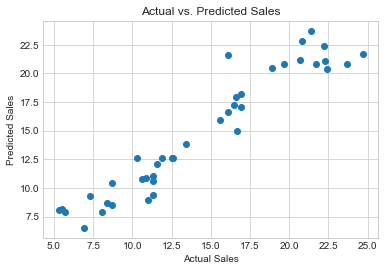

In [25]:
# Visualize the actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()